In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras import Model

### Goal : Diabetes Prediction of the Pima Indians
##### The code in this file was written based on the Github repository at the link below.
##### https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/02_Pima_Indian.ipynb

### Example data load
#### Load the Pima Indian Diabetes dataset. When loading, specify the name corresponding to each column.

In [3]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/pima-indians-diabetes.csv'
Dataset = pd.read_csv(url, names=['pregnant','plasma','pressure','thickness','insulin','BMI','predigree','age','class'])

### Deep learning 

#### Convert pandas dataframe into numpy data

In [4]:
X = Dataset.values[:, :8]
Y = Dataset.values[:, 8:]
X.shape, Y.shape

((768, 8), (768, 1))

#### Set up the model

In [6]:
## Input layer with 17 features
InpLayer = Input(shape=(X.shape[-1]), name='Inp')

HL1 = Dense(5, activation='tanh', name='HL1')(InpLayer)
HL2 = Dense(5, activation='tanh', name='HL2')(InpLayer)
HL3 = Dense(5, activation='tanh', name='HL3')(InpLayer)
Concat1 = Concatenate(axis=-1)([HL1,HL2,HL3])
HL4 = Dense(5, activation='tanh', name='HL4')(Concat1)


Out = Dense(1, activation='sigmoid', name='Out')(HL4)

### Defining the model by specifying inputs and outputs
model = Model(InpLayer, Out)
model.summary()

#### Compliling the model
model.compile(loss='BCE', optimizer='adam')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inp (InputLayer)                [(None, 8)]          0                                            
__________________________________________________________________________________________________
HL1 (Dense)                     (None, 5)            45          Inp[0][0]                        
__________________________________________________________________________________________________
HL2 (Dense)                     (None, 5)            45          Inp[0][0]                        
__________________________________________________________________________________________________
HL3 (Dense)                     (None, 5)            45          Inp[0][0]                        
____________________________________________________________________________________________

In [7]:
model.fit(X,Y, validation_split=0.2, epochs=200, batch_size=200)
Logs = model.history.history

Epoch 1/200
4/4 [==============================] - 2s 459ms/step - loss: 1.4719 - val_loss: 1.3952
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 1.4292 - val_loss: 1.3352
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 1.3725 - val_loss: 1.2741
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 1.2782 - val_loss: 1.2148
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 1.2191 - val_loss: 1.1547
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 1.1409 - val_loss: 1.0931
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 1.0541 - val_loss: 1.0387
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 1.0164 - val_loss: 0.9827
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.9485 - val_loss: 0.9322
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 0.9029 - val_loss: 0.8838
Epoch 11/200
4/4 [

### Visualization of losses

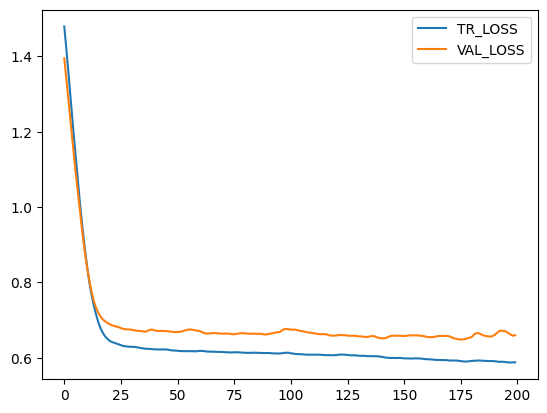

In [8]:
import matplotlib.pyplot as plt
plt.plot(Logs['loss'], label='TR_LOSS')
plt.plot(Logs['val_loss'], label='VAL_LOSS')
plt.legend()